<a href="https://colab.research.google.com/github/claracaspard/Data-Science-Projects/blob/main/FeatureEngineering_ModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing relevant python modules
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# # The module re is for regular expressions
import re


In [11]:
#loading Titanic data
df = pd.read_csv('https://raw.githubusercontent.com/AashitaK/datasets/main/titanic.csv')

#add title column
df['Title'] = df['Name'].apply(lambda name: re.findall("\w+[.]", name)[0])

df.Title.replace({'Ms.': 'Miss.', 'Mlle.': 'Miss.', 'Dr.': 'Rare', 'Mme.': 'Mrs.',
                  'Major.': 'Rare', 'Lady.': 'Rare', 'Sir.': 'Rare', 'Col.': 'Rare',
                  'Capt.': 'Rare', 'Countess.': 'Rare', 'Jonkheer.': 'Rare',
                  'Dona.': 'Rare', 'Don.': 'Rare', 'Rev.': 'Rare'}, inplace=True)

df.head()


,0
PassengerId,5
Survived,5
Pclass,5
Name,5
Sex,5
Age,5
SibSp,5
Parch,5
Ticket,5
Fare,5


In [14]:
#replacing missing ages with median age according to title

#new column for median age
df['Median_Age']=df.groupby('Title').transform("median", numeric_only=True)['Age']

df['Age']=df['Age'].fillna(df['Median_Age'])

df = df.drop('Median_Age', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


<Axes: xlabel='Family', ylabel='Survived'>

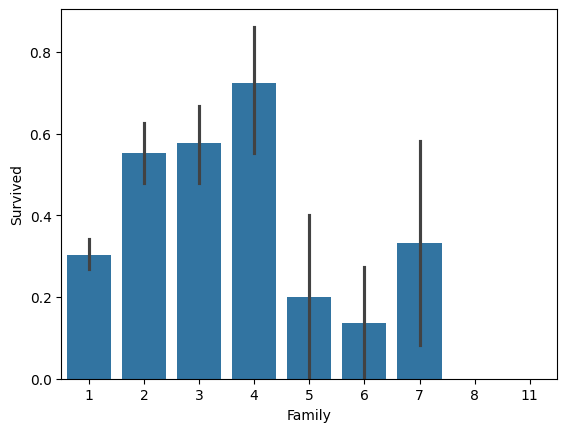

In [18]:
df["Family"]=df["SibSp"]+df["Parch"]+1

#checking family survival rates
sns.barplot(x="Family", y='Survived', data=df)

<Axes: xlabel='TicketCount', ylabel='Survived'>

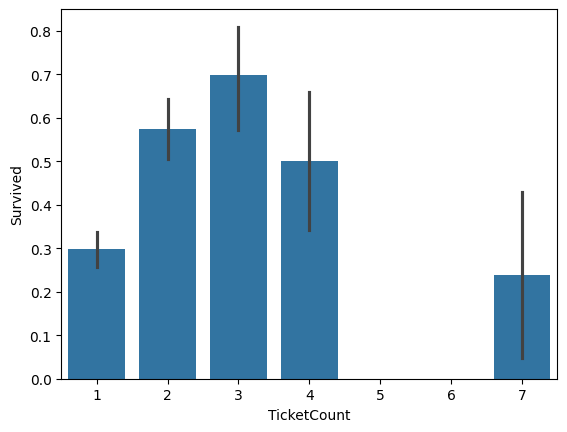

In [42]:
#df[df['Ticket'] =='1601']

#total number of passengers per ticket
df["TicketCount"]=df.groupby('Ticket').transform("count")['Fare']
df.head()

sns.barplot(x="TicketCount", y='Survived', data=df)

(97, 191)

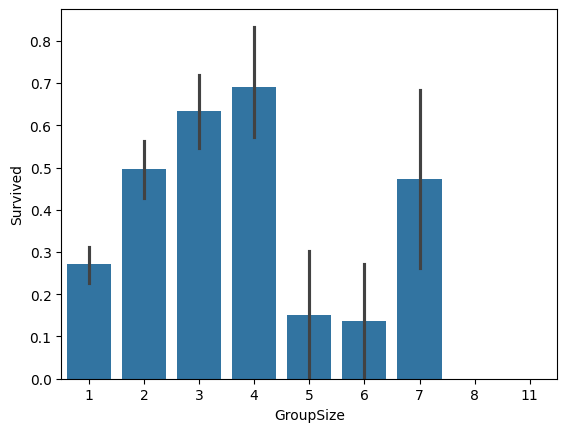

In [39]:
df['GroupSize'] = df[['Family', 'TicketCount']].max(axis=1)
df.head()
sns.barplot(x="GroupSize", y='Survived', data=df)
df[df['GroupSize'] != df['Family']].shape[0], df[df['GroupSize'] != df['TicketCount']].shape[0]


In [43]:
df=df.replace({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1


In [47]:
port_df = pd.get_dummies(df["Embarked"], prefix="Port")
#port_df

pd.concat([df,port_df],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize,Port_C,Port_Q,Port_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Rare,1,1,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1,1,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4,2,4,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1,1,True,False,False


In [55]:
X = df[['Age', 'GroupSize']]
y = df['Survived'].astype('category')

In [56]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [57]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on validation set: 0.62
